In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from bagsolver.bag import Bag
from bagsolver.base import BagBase
from bagsolver.genetic import GeneticBagSolver

from bagsolver.utils import load_bag_data, parse_solution

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
data = load_bag_data("data/NK/NK40_inst.dat", "data/NK/NK40_sol.dat")

In [26]:
defi, bagsol = data[0]

In [27]:
iid, count, target, target_items = parse_solution(bagsol)

In [85]:
from tqdm import tqdm
import time
from bagsolver.genetic import GeneticBagSolver

bag = GeneticBagSolver.from_line(defi, batch_size=320, mutation_rate=0.02)
pool = bag.new_pool_random()

records = []
start = time.time()
for i in tqdm(range(100)):
    pool = bag.genetic_iteration(pool)
    batch_stats = bag.pool_fitness(pool)
    t = time.time() - start
    records.extend(
        list(zip([i]*len(batch_stats), [t]*len(batch_stats), batch_stats))
    )
    if t > 3:
        break

 81%|████████  | 81/100 [00:03<00:00, 26.88it/s]


In [86]:
df = pd.DataFrame(records, columns = ["it", "time", "res"])
df.res = df.res/target
df = df.set_index("time")

pf = df.groupby(by="time").agg({"res": ["min", "mean", "max"]})
pf.columns = ["min", "mean", "max"]
pf["best"] = np.maximum.accumulate(pf["max"].values)

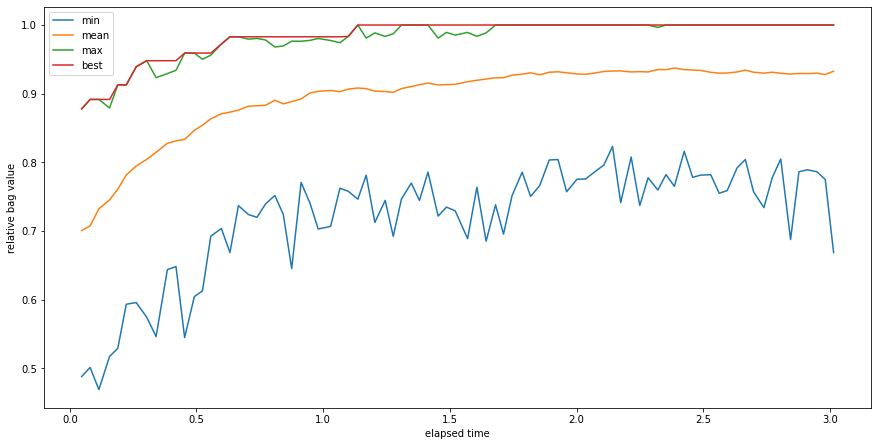

In [91]:
fig, ax = plt.subplots(figsize=(12, 6))

pf.plot(ax=ax)
ax.set_xlabel("elapsed time")
ax.set_ylabel("relative bag value")
plt.tight_layout(pad=0)
plt.savefig('report4/images/detail.png', bbox_inches='tight')

## Pilot

In [10]:
df = pd.read_csv("pilot4-multi.csv")

df["err"] = (df.target - df.best_score)/df.target

In [15]:
rd = df[df.init_method == "random"]
rn = df[df.init_method == "naive"]

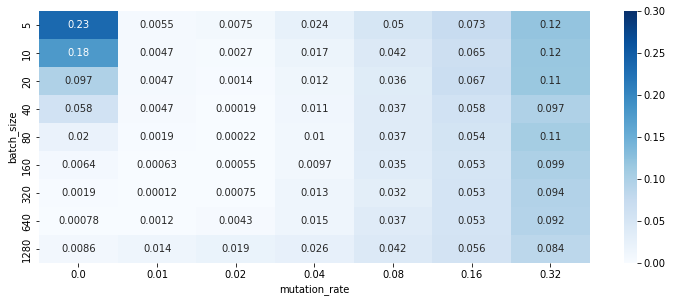

In [23]:
result_matrix = rd.groupby(by=["batch_size", "mutation_rate"])["err"].mean().unstack()

fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(result_matrix, annot=True, vmin=0, vmax=0.3, cmap="Blues", ax=ax)
# ax.set_title("NK40 Dataset; 3s Runtime; 100 Instances Mean Relative Error")
plt.tight_layout(pad=0)
plt.savefig('report4/images/pilot_random.png', bbox_inches='tight')
plt.show()

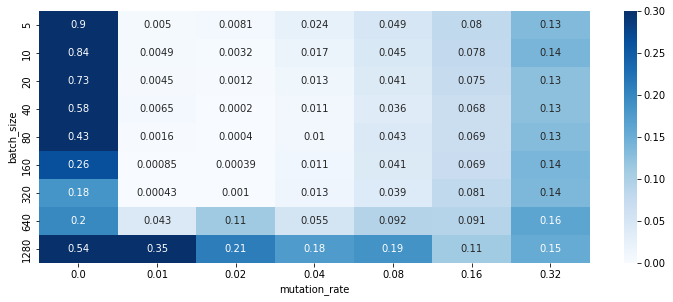

In [24]:
result_matrix = rn.groupby(by=["batch_size", "mutation_rate"])["err"].mean().unstack()

fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(result_matrix, annot=True, vmin=0, vmax=0.3, cmap="Blues", ax=ax)
# ax.set_title("NK40 Dataset; 3s Runtime; 100 Instances Mean Relative Error")
plt.tight_layout(pad=0)
plt.savefig('report4/images/pilot_naive.png', bbox_inches='tight')
plt.show()